Read in the GeoJSON file

In [4]:
file = open('/Volumes/PROJECT/1000545-054-globalbeaches/04_Shoreline_Monitor_data_requests/Data_requests/SITO SIDS/Merged_Shorelines/QA_ed/boxes_combined_QAed.geojson')
geojson = json.load(file)
features = geojson.get('features')
#print(len(features))


Get 'timing'

In [5]:
timing = []
for i in range(0,len(features)):
    timing.append(features[i].get('properties').get('timing'))
print(np.unique(timing))
print(len(np.unique(timing)))

['2004-01' '2014-01' '2015-01' '2016-01' '2017-01' '2018-01' '2019-01'
 '2020-01' '2021-01']
9


get colour map hex codes

['#000004', '#1c0c43', '#4d0d6c', '#7c1d6d', '#a92e5e', '#d34743', '#f06f20', '#fca309', '#f5db4c']
9


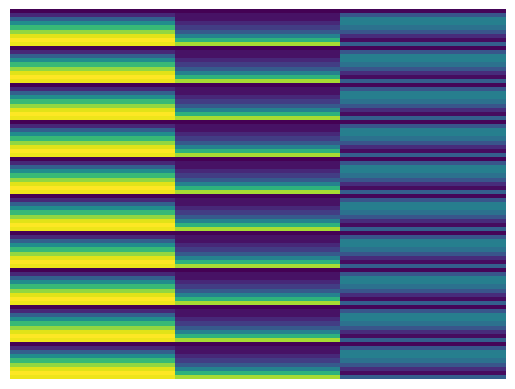

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

# Get the 'jet' color map
cmap = plt.get_cmap('inferno')

# Convert the color map to RGB values
#rgba_vals = cmap(range(cmap.N))
#rgba_vals = cmap(range(0,cmap.N,int(cmap.N/len(np.unique(timing)))))
rgba_vals = cmap(range(0,cmap.N,int(np.ceil(cmap.N/len(np.unique(timing))))))
rgb_vals = [colors.rgb2hex(x[:3]) for x in rgba_vals]

print(rgb_vals)
print(len(rgb_vals))

# Convert the RGBA values to float representation
float_vals = np.array([x[:3] for x in rgba_vals]) / 255.0

# Create a color map image with the RGB values
color_map = np.tile(float_vals, (10, 1))

plt.imshow(color_map, aspect='auto')
plt.axis('off')
plt.show()